In [1]:
# (7/3/20) Following a structured process for machine learning, using Energy Efficiency dataset from UCI found here:
# https://archive.ics.uci.edu/ml/datasets/Energy+efficiency

## 1st: import necessary packages and dataset

In [2]:
import pandas as pd
import numpy as np
from numpy import set_printoptions
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, explained_variance_score, cohen_kappa_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression, RFE, f_classif
import matplotlib.pyplot as plt
import math

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, SVR
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.multioutput import MultiOutputClassifier, MultiOutputRegressor
from matplotlib.legend_handler import HandlerLine2D
from sklearn.model_selection import GridSearchCV

from sklearn.dummy import DummyClassifier,DummyRegressor
from sklearn.pipeline import Pipeline

C:\Users\ver2bj\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\ver2bj\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\dataframe\utils.py:13: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\ver2bj\AppData\Local\Continuum\anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [3]:
data = pd.read_csv('ENB2012_data.csv')

## 2nd: explore and understand the data. Re-state objective: to predict Heating and Cooling Loads

In [4]:
data.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distributon,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84,28.28


In [5]:
# 2a) We have 8 features and 2 prediction targets - Heating Load and Cooling Load. Total of 768 samples.

data.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distributon,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


C:\Users\ver2bj\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\ver2bj\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
No handles with labels found to put in legend.


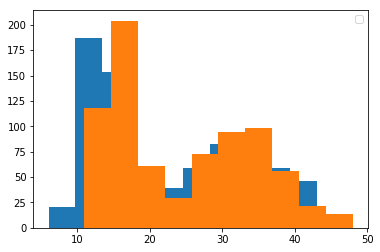

In [6]:
plt.hist(data['Heating Load'])
plt.hist(data['Cooling Load'])
plt.legend()

In [7]:
data.skew()

Relative Compactness        0.495513
Surface Area               -0.125131
Wall Area                   0.533417
Roof Area                  -0.162764
Overall Height              0.000000
Orientation                 0.000000
Glazing Area               -0.060254
Glazing Area Distributon   -0.088689
Heating Load                0.360449
Cooling Load                0.395992
dtype: float64

In [8]:
# Insights:
# - Different magnitudes for different features. 
# - Height, orientation, glazing area are discrete and not continuous - they represent different types of buildings.

## 2c: use correlation matrix to understand existing links


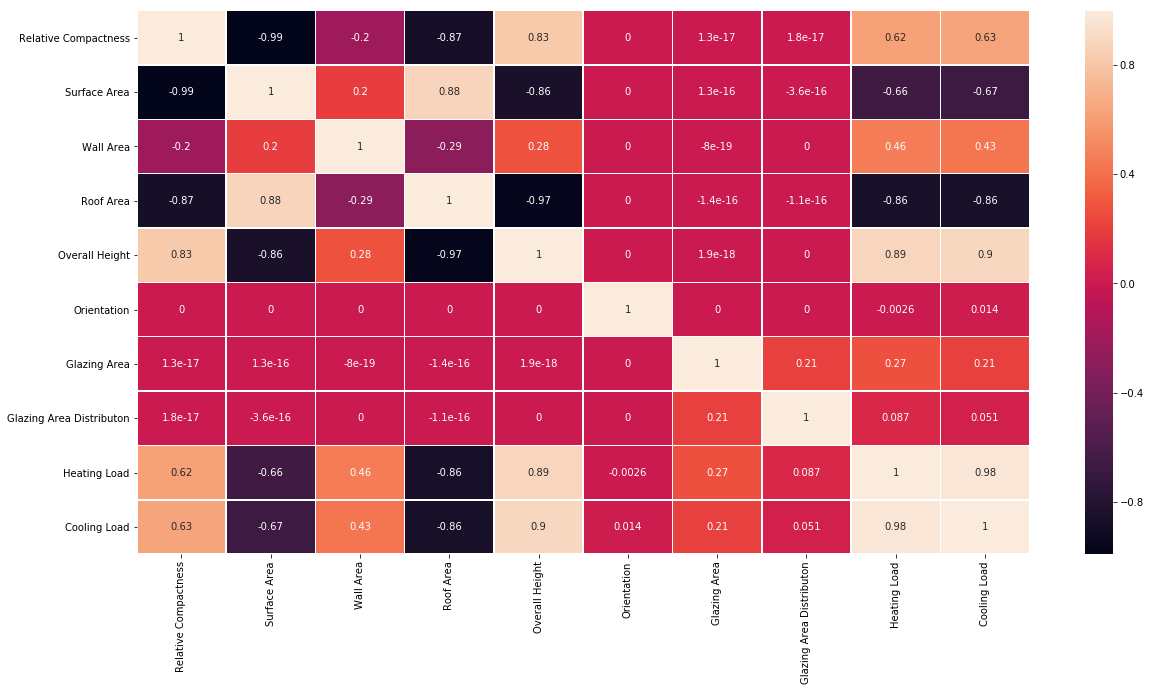

In [9]:
fig, ax = plt.subplots(figsize=(20,10)) # Sample figsize in inches
sns.heatmap(data.corr(), annot=True, linewidths=.5, ax=ax)

## 2c: use Seaborn heatmaps to understand trends of different features against target. This lets us explore the data and get early insight into leveraging independent variables.


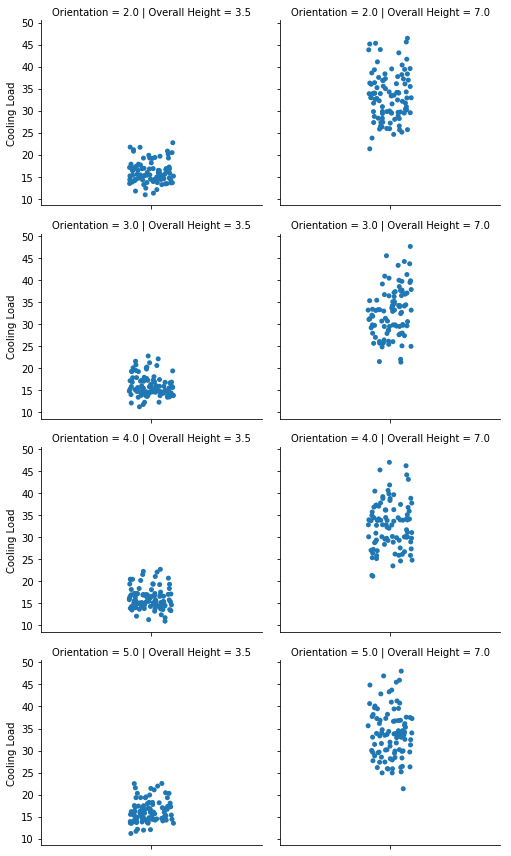

In [10]:
c = sns.catplot(y='Cooling Load',data=data,col='Overall Height',row='Orientation',
                height=3, aspect=1.2)

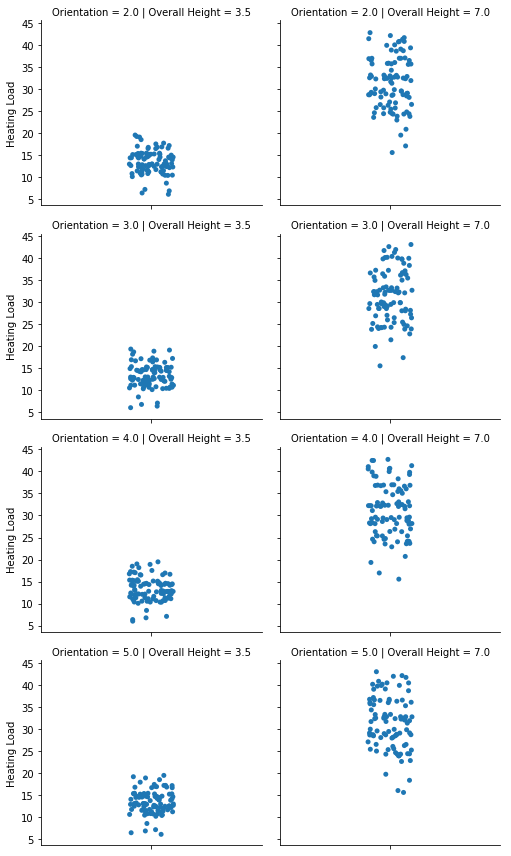

In [11]:
g = sns.catplot(y='Heating Load',data=data,col='Overall Height',row='Orientation',
                height=3, aspect=1.2)

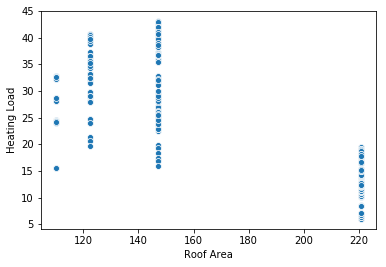

In [12]:
g = sns.scatterplot(data['Roof Area'],data['Heating Load'])

## Cumulative Insights of Relative Compactness, Surface Area, Wall Area, Roof Area, Overall Height, Orientation, Glazing Area

### (1) Buiding height=3.5 has heating load of 10-20, height=7 has load of 25-45 independent of other features.
### (2) Building orientation offers no clear visible correlation with heating or cooling load
### (3) Heating and cooling loads increase with increased glazing area. 
### (4) Except for roof area of 220 which leads to lower energy loads, no connection between roof area and energy load.
### (5) Surface area > 675 leads to smaller heating load. 
### (6) No clear correlation between wall area and heating load.

## 3) We will now transition efforts to modeling. Before that, we want to check:
### - that all data is numeric to afford analysis
### - that there are no null or na values and that existing skewness doesn't require log-transform of data

In [13]:
data.dtypes # Confirmed that all numbers are numerical

Relative Compactness        float64
Surface Area                float64
Wall Area                   float64
Roof Area                   float64
Overall Height              float64
Orientation                 float64
Glazing Area                float64
Glazing Area Distributon    float64
Heating Load                float64
Cooling Load                float64
dtype: object

In [14]:
data.dropna(inplace=True)
data.skew() #All skewness values have absolute values < 1.

Relative Compactness        0.495513
Surface Area               -0.125131
Wall Area                   0.533417
Roof Area                  -0.162764
Overall Height              0.000000
Orientation                 0.000000
Glazing Area               -0.060254
Glazing Area Distributon   -0.088689
Heating Load                0.360449
Cooling Load                0.395992
dtype: float64

## 3b) Create x and y columns for Linear Regression Modeling.

### First, use feature selection to determine best input variables to use in model. From analysis above, I'd expect glazing area, surface area, wall area, roof area, relative compactness (correlated with surface area) to be leveraging.
### Use RFE and k-best features filtering with Pearson correlation coefficient.
### Compare output of these feature selection exercises with seaborn catmaps. Is the narrative consistent?

In [15]:
x = data.drop(columns=['Heating Load','Cooling Load'])
y1 = data['Heating Load']
y2 = data['Cooling Load']

In [16]:
lm = LinearRegression()
rfe = RFE(lm,5) #Try 5 from 8 features

In [17]:
fit = rfe.fit(x,y1)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 5
Selected Features: [ True  True  True  True False False  True False]
Feature Ranking: [1 1 1 1 2 4 1 3]


In [18]:
# feature extraction
test = SelectKBest(score_func=f_regression, k=4)
fit = test.fit(x,y1)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(x)
# summarize selected features
print(features[0:5,:])

[4.840e+02 5.853e+02 2.007e+02 2.212e+03 2.901e+03 5.125e-03 6.016e+01
 5.892e+00]
[[  0.98 514.5  110.25   7.  ]
 [  0.98 514.5  110.25   7.  ]
 [  0.98 514.5  110.25   7.  ]
 [  0.98 514.5  110.25   7.  ]
 [  0.9  563.5  122.5    7.  ]]


In [19]:
# How do heatmap correlations compare with RFE? From RFE heatmap (Pearson corr # from heatmap)
# relative compactness (0.62), surface area (0.67), wall area (0.43), roof area (0.86), glazing area (0.27)

In [20]:
x.drop(columns=['Glazing Area Distributon','Orientation','Overall Height','Relative Compactness'],inplace=True)

In [21]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x, y1, test_size=0.33, random_state=42)
x2_train, x2_test, y2_train, y2_test = train_test_split(x, y2, test_size=0.33, random_state=24)


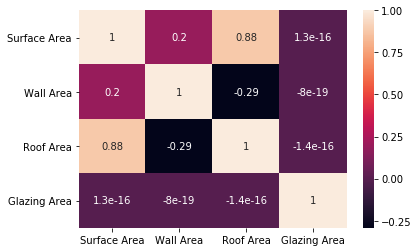

In [22]:
sns.heatmap(x.corr(),annot=True)

In [23]:
x['Total SA'] = x['Roof Area'] + x['Wall Area']
x.drop(columns=['Roof Area','Wall Area'],inplace=True)

## 4a) Now create and check accuracy of Linear Regression using RMSE and comparing with standard deviation of original data.

In [24]:
# Generate two LinearRegression models
lm_hot = LinearRegression()
lm_cold = LinearRegression()

In [25]:
lm_hot.fit(x1_train,y1_train)
lm_cold.fit(x2_train,y2_train)

y1_pred = lm_hot.predict(x1_test)
y2_pred = lm_cold.predict(x2_test)

Hot_Error = math.sqrt(mean_squared_error(y1_pred, y1_test))
Cold_Error = math.sqrt(mean_squared_error(y2_pred, y2_test))

print('Root Mean Square Error for Heating Load prediction is %s' % round(Hot_Error,3))
print('This error, as percentage of Heating Load standard deviation, is %s' % round(Hot_Error/data['Heating Load'].std(axis=0)*100,2))

print('Root Mean Square Error for Cooling Load prediction is %s' % round(Cold_Error,3))
print('This error, as percentage of Cooling Load standard deviation, is %s' % round(Cold_Error/data['Cooling Load'].std(axis=0)*100,2))


Root Mean Square Error for Heating Load prediction is 3.826
This error, as percentage of Heating Load standard deviation, is 37.91
Root Mean Square Error for Cooling Load prediction is 4.136
This error, as percentage of Cooling Load standard deviation, is 43.48


In [26]:
# What if we try cross validation lieu of test train split?
FinalScore_Heat = np.average(cross_val_score(lm, x, y1, cv=6, scoring='r2'))
FinalScore_Cool = np.average(cross_val_score(lm, x, y2, cv=6, scoring='r2'))

In [27]:
print('R-square of curve predicting Heating Load is %s' % round(FinalScore_Heat*100,2))
print('R-square of curve predicting Cooling Load is %s' % round(FinalScore_Cool*100,2))

R-square of curve predicting Heating Load is 83.94
R-square of curve predicting Cooling Load is 80.75


In [28]:
FinalScore_Heat = []
FinalScore_Cool = []

for i in range(10):
    Heat = np.average(cross_val_score(lm, x, y1, cv=i+2, scoring='r2'))
    FinalScore_Heat.append(Heat)
    Cool = np.average(cross_val_score(lm, x, y2, cv=i+2, scoring='r2'))
    FinalScore_Cool.append(Cool)

In [29]:
# Just curious; what if I hadn't dropped Glazing Distribution, orientation, height?

x = data.drop(columns=['Heating Load','Cooling Load'])
y1 = data['Heating Load']
y2 = data['Cooling Load']

x1_train, x1_test, y1_train, y1_test = train_test_split(x, y1, test_size=0.33, random_state=42)
x2_train, x2_test, y2_train, y2_test = train_test_split(x, y2, test_size=0.33, random_state=24)

lm_hot.fit(x1_train,y1_train)
lm_cold.fit(x2_train,y2_train)

y1_pred = lm_hot.predict(x1_test)
y2_pred = lm_cold.predict(x2_test)

Hot_Error = math.sqrt(mean_squared_error(y1_pred, y1_test))
Cold_Error = math.sqrt(mean_squared_error(y2_pred, y2_test))

print('Root Mean Square Error for Heating Load prediction is %s' % round(Hot_Error,3))
print('This error, as percentage of Heating Load standard deviation, is %s' % round(Hot_Error/data['Heating Load'].std(axis=0)*100,2))

print('Root Mean Square Error for Cooling Load prediction is %s' % round(Cold_Error,3))
print('This error, as percentage of Cooling Load standard deviation, is %s' % round(Cold_Error/data['Cooling Load'].std(axis=0)*100,2))


Root Mean Square Error for Heating Load prediction is 2.967
This error, as percentage of Heating Load standard deviation, is 29.4
Root Mean Square Error for Cooling Load prediction is 3.325
This error, as percentage of Cooling Load standard deviation, is 34.95


In [30]:
# Just curious; what if I create one Total SA feature and drop contributing surface areas?
x['Total SA'] = x['Surface Area'] + x['Wall Area'] + x['Roof Area']
x.drop(columns=['Surface Area','Wall Area','Roof Area'],inplace=True)

In [31]:
y1 = data['Heating Load']
y2 = data['Cooling Load']

x1_train, x1_test, y1_train, y1_test = train_test_split(x, y1, test_size=0.33, random_state=42)
x2_train, x2_test, y2_train, y2_test = train_test_split(x, y2, test_size=0.33, random_state=24)

lm_hot.fit(x1_train,y1_train)
lm_cold.fit(x2_train,y2_train)

y1_pred = lm_hot.predict(x1_test)
y2_pred = lm_cold.predict(x2_test)

Hot_Error = math.sqrt(mean_squared_error(y1_pred, y1_test))
Cold_Error = math.sqrt(mean_squared_error(y2_pred, y2_test))

print('Root Mean Square Error for Heating Load prediction is %s' % round(Hot_Error,3))
print('This error, as percentage of Heating Load standard deviation, is %s' % round(Hot_Error/data['Heating Load'].std(axis=0)*100,2))

print('Root Mean Square Error for Cooling Load prediction is %s' % round(Cold_Error,3))
print('This error, as percentage of Cooling Load standard deviation, is %s' % round(Cold_Error/data['Cooling Load'].std(axis=0)*100,2))


Root Mean Square Error for Heating Load prediction is 3.076
This error, as percentage of Heating Load standard deviation, is 30.48
Root Mean Square Error for Cooling Load prediction is 3.423
This error, as percentage of Cooling Load standard deviation, is 35.98


In [32]:
# x['Total SA'] = x['Surface Area'] + x['Wall Area'] + x['Roof Area']
x.drop(columns=['Relative Compactness'],inplace=True)

In [33]:
y1 = data['Heating Load']
y2 = data['Cooling Load']

x1_train, x1_test, y1_train, y1_test = train_test_split(x, y1, test_size=0.33, random_state=42)
x2_train, x2_test, y2_train, y2_test = train_test_split(x, y2, test_size=0.33, random_state=24)

lm_hot.fit(x1_train,y1_train)
lm_cold.fit(x2_train,y2_train)

y1_pred = lm_hot.predict(x1_test)
y2_pred = lm_cold.predict(x2_test)

Hot_Error = math.sqrt(mean_squared_error(y1_pred, y1_test))
Cold_Error = math.sqrt(mean_squared_error(y2_pred, y2_test))

print('Root Mean Square Error for Heating Load prediction is %s' % round(Hot_Error,3))
print('This error, as percentage of Heating Load standard deviation, is %s' % round(Hot_Error/data['Heating Load'].std(axis=0)*100,2))

print('Root Mean Square Error for Cooling Load prediction is %s' % round(Cold_Error,3))
print('This error, as percentage of Cooling Load standard deviation, is %s' % round(Cold_Error/data['Cooling Load'].std(axis=0)*100,2))


Root Mean Square Error for Heating Load prediction is 3.075
This error, as percentage of Heating Load standard deviation, is 30.48
Root Mean Square Error for Cooling Load prediction is 3.429
This error, as percentage of Cooling Load standard deviation, is 36.05


In [34]:
x = data.drop(columns=['Heating Load','Cooling Load'])
y1 = data['Heating Load']
y2 = data['Cooling Load']

std = StandardScaler()
x_std = std.fit(x).transform(x)

x1_train, x1_test, y1_train, y1_test = train_test_split(x_std, y1, test_size=0.33, random_state=42)
x2_train, x2_test, y2_train, y2_test = train_test_split(x_std, y2, test_size=0.33, random_state=24)

lm_hot.fit(x1_train,y1_train)
lm_cold.fit(x2_train,y2_train)

y1_pred_lin = lm_hot.predict(x1_test)
y2_pred_lin = lm_cold.predict(x2_test)

Hot_Error = math.sqrt(mean_squared_error(y1_pred_lin, y1_test))
Cold_Error = math.sqrt(mean_squared_error(y2_pred_lin, y2_test))

print('Root Mean Square Error for Heating Load prediction is %s' % round(Hot_Error,3))
print('This error, as percentage of Heating Load standard deviation, is %s' % round(Hot_Error/data['Heating Load'].std(axis=0)*100,2))

print('Root Mean Square Error for Cooling Load prediction is %s' % round(Cold_Error,3))
print('This error, as percentage of Cooling Load standard deviation, is %s' % round(Cold_Error/data['Cooling Load'].std(axis=0)*100,2))


Root Mean Square Error for Heating Load prediction is 2.965
This error, as percentage of Heating Load standard deviation, is 29.38
Root Mean Square Error for Cooling Load prediction is 3.324
This error, as percentage of Cooling Load standard deviation, is 34.94


In [35]:
Hot_lin_ExpVar = explained_variance_score(y1_pred_lin,y1_test)
Cold_lin_ExpVar = explained_variance_score(y2_pred_lin,y2_test)

print('%s percent of variance in hot load prediction is explained' % round(Hot_lin_ExpVar*100,1))
print('%s percent of variance in cold load prediction is explained' % round(Cold_lin_ExpVar*100,1))

90.8 percent of variance in hot load prediction is explained
86.7 percent of variance in cold load prediction is explained


## 4b) Now create and check accuracy of Classification models.
### First, this requires creating crisp classes of output variables by rounding Heating and Cooling loads.

In [36]:
data = pd.read_csv('ENB2012_data.csv')
data.dropna(inplace=True)
data.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distributon,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84,28.28


In [37]:
data['Heating Load'] = round(data['Heating Load'])
data['Cooling Load'] = round(data['Cooling Load'])

In [38]:
class_counts_heat = data.groupby('Heating Load').size()
class_counts_cool = data.groupby('Cooling Load').size()

In [39]:
## Let's also check features chosen for classification vs. regression
x = data.drop(columns=['Heating Load','Cooling Load'])
y1 = data['Heating Load']
y2 = data['Cooling Load']

std = StandardScaler()
x_scaled = std.fit(x).transform(x)

In [40]:
lr = LogisticRegression(multi_class='auto',max_iter=2000)
rfe = RFE(lr,5) #Try 5 from 8 features

fit = rfe.fit(x_scaled,y1)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 5
Selected Features: [ True False  True  True  True False  True False]
Feature Ranking: [1 3 1 1 1 4 1 2]


In [41]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x, y1, test_size=0.33, random_state=42)
x2_train, x2_test, y2_train, y2_test = train_test_split(x, y2, test_size=0.33, random_state=24)

In [42]:
x1_train_sc, x1_test_sc, y1_train, y1_test = train_test_split(x_scaled, y1, test_size=0.33, random_state=42)
x2_train_sc, x2_test_sc, y2_train, y2_test = train_test_split(x_scaled, y2, test_size=0.33, random_state=24)

# Generate two LogReg models
lr_hot = LogisticRegression(multi_class='auto',max_iter=2000)
lr_cold = LogisticRegression(multi_class='auto',max_iter=2000)

lr_hot.fit(x1_train_sc,y1_train)
lr_cold.fit(x2_train_sc,y2_train)

y1_pred_log = lr_hot.predict(x1_test_sc)
y2_pred_log = lr_cold.predict(x2_test_sc)

In [43]:
Cohen_Kappa_hot = cohen_kappa_score(y1_test,y1_pred_log)
Cohen_Kappa_cold = cohen_kappa_score(y2_test,y2_pred_log)

print('Kappa score for heat loading is only "fair", given score of %s' % round(Cohen_Kappa_hot,2))
print('Kappa score for cold loading is only "fair", given score of %s' % round(Cohen_Kappa_cold,2))

Kappa score for heat loading is only "fair", given score of 0.27
Kappa score for cold loading is only "fair", given score of 0.29


In [44]:
# Select KBest above chose 'compactness','wall area','roof area','height','glazing area'.
x.drop(columns=['Glazing Area Distributon','Overall Height','Orientation'],inplace=True)

x_scaled = std.fit(x).transform(x)

In [45]:
x1_train_sc, x1_test_sc, y1_train, y1_test = train_test_split(x_scaled, y1, test_size=0.33, random_state=42)
x2_train_sc, x2_test_sc, y2_train, y2_test = train_test_split(x_scaled, y2, test_size=0.33, random_state=24)

# Generate two LogReg models
lr_hot = LogisticRegression(multi_class='auto',max_iter=2000)
lr_cold = LogisticRegression(multi_class='auto',max_iter=2000)

lr_hot.fit(x1_train_sc,y1_train)
lr_cold.fit(x2_train_sc,y2_train)

y1_pred_log = lr_hot.predict(x1_test_sc)
y2_pred_log = lr_cold.predict(x2_test_sc)

In [46]:
Cohen_Kappa_hot = cohen_kappa_score(y1_test,y1_pred_log)
Cohen_Kappa_cold = cohen_kappa_score(y2_test,y2_pred_log)

print('Kappa score for heat loading is still only "fair", given score of %s' % round(Cohen_Kappa_hot,2))
print('Kappa score for cold loading is still only "fair", given score of %s' % round(Cohen_Kappa_cold,2))

Kappa score for heat loading is still only "fair", given score of 0.24
Kappa score for cold loading is still only "fair", given score of 0.3


## 4c) Can the scores above be improved? Let's try some regression models and some more classifiers with a list of models and for loop

### We'll first create the required instances of models in a 'classfiers' vector and run through these in fitting, predicting on test set.

In [47]:
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(7,weights='distance',algorithm='kd_tree'),
    SVC(gamma=9, C=2),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    XGBClassifier(),
    DummyClassifier()]

In [48]:
x = data.drop(columns=['Heating Load','Cooling Load'])
y1 = data['Heating Load']
y2 = data['Cooling Load']

y1 = round(y1)
y2 = round(y2)

In [49]:
x['Total Area'] = x['Surface Area'] + x['Roof Area'] + x['Wall Area']
x.drop(columns=['Glazing Area Distributon','Overall Height','Orientation'],inplace=True)

std = StandardScaler()

x_scaled = std.fit(x).transform(x)

In [50]:
Heating_Load_Kappa = []
Cooling_Load_Kappa = []

for name, clf in zip(names, classifiers):
    x1_train_sc, x1_test_sc, y1_train, y1_test = train_test_split(x_scaled, y1, test_size=0.1, random_state=42)
    x2_train_sc, x2_test_sc, y2_train, y2_test = train_test_split(x_scaled, y2, test_size=0.2, random_state=24)
    clf.fit(x1_train_sc, y1_train)
    y1_pred = clf.predict(x1_test_sc)
    Cohen_Kappa_hot = round(cohen_kappa_score(y1_test,y1_pred),2)
    Heating_Load_Kappa.append(Cohen_Kappa_hot)
    
    clf.fit(x2_train_sc, y2_train)
    y2_pred = clf.predict(x2_test_sc)
    y2_prob_pred = clf.predict(x2_test_sc)
    Cohen_Kappa_cold = round(cohen_kappa_score(y2_test,y2_pred),2)    
    Cooling_Load_Kappa.append(Cohen_Kappa_cold)



C:\Users\ver2bj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [51]:
from pandas import DataFrame

Heating_Load_Prediction_kappa = DataFrame([Heating_Load_Kappa],columns=['KNeighborsClassifier','SVC',
                                                                      'Decision Tree Classifier','Random Forest Classifier',
                                                                      'AdaBoost Classifier','GaussianNB','XGB','Dummy'])

Cooling_Load_Prediction_kappa = DataFrame([Cooling_Load_Kappa],columns=['KNeighborsClassifier','SVC',
                                                                      'Decision Tree Classifier','Random Forest Classifier',
                                                                      'AdaBoost Classifier','GaussianNB','XGB','Dummy'])

In [52]:
Heating_Load_Prediction_kappa

,KNeighborsClassifier,SVC,Decision Tree Classifier,Random Forest Classifier,AdaBoost Classifier,GaussianNB,XGB,Dummy
0,0.63,0.63,0.63,0.63,0.05,0.31,0.63,0.01


In [53]:
Cooling_Load_Prediction_kappa

,KNeighborsClassifier,SVC,Decision Tree Classifier,Random Forest Classifier,AdaBoost Classifier,GaussianNB,XGB,Dummy
0,0.5,0.52,0.54,0.51,0.12,0.43,0.51,0.0


In [54]:
# Drop AdaBoost and GaussianNB - focus on tuning other four Classifiers. 

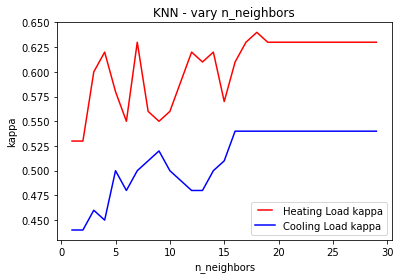

In [55]:
Heating_Load_Kappa = []
Cooling_Load_Kappa = []

neighbors = list(range(1,30))

for n in neighbors:
    
    model = KNeighborsClassifier(n_neighbors=n,weights='distance',algorithm='kd_tree')
    model.fit(x1_train_sc, y1_train)
    y1_pred = model.predict(x1_test_sc)
    Cohen_Kappa_hot = round(cohen_kappa_score(y1_test,y1_pred),2)
    
    model.fit(x2_train_sc, y2_train)
    y2_pred = model.predict(x2_test_sc)
    Cohen_Kappa_cold = round(cohen_kappa_score(y2_test,y2_pred),2)
    
    Heating_Load_Kappa.append(Cohen_Kappa_hot)
    Cooling_Load_Kappa.append(Cohen_Kappa_cold)
    


line1, = plt.plot(neighbors, Heating_Load_Kappa, 'r', label = 'Heating Load kappa')
line2, = plt.plot(neighbors, Cooling_Load_Kappa, 'b', label = 'Cooling Load kappa')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('kappa')
plt.xlabel('n_neighbors')
plt.title('KNN - vary n_neighbors')
plt.show()

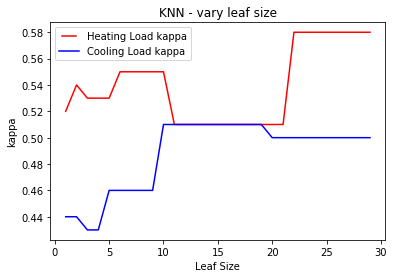

In [56]:
Heating_Load_Kappa = []
Cooling_Load_Kappa = []

leaf_sizes = list(range(1,30))

for l in leaf_sizes:
    
    model = KNeighborsClassifier(leaf_size=l,weights='distance',algorithm='kd_tree')
    model.fit(x1_train_sc, y1_train)
    y1_pred = model.predict(x1_test_sc)
    Cohen_Kappa_hot = round(cohen_kappa_score(y1_test,y1_pred),2)
    
    model.fit(x2_train_sc, y2_train)
    y2_pred = model.predict(x2_test_sc)
    Cohen_Kappa_cold = round(cohen_kappa_score(y2_test,y2_pred),2)
    
    Heating_Load_Kappa.append(Cohen_Kappa_hot)
    Cooling_Load_Kappa.append(Cohen_Kappa_cold)
    


line1, = plt.plot(neighbors, Heating_Load_Kappa, 'r', label = 'Heating Load kappa')
line2, = plt.plot(neighbors, Cooling_Load_Kappa, 'b', label = 'Cooling Load kappa')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('kappa')
plt.xlabel('Leaf Size')
plt.title('KNN - vary leaf size')
plt.show()

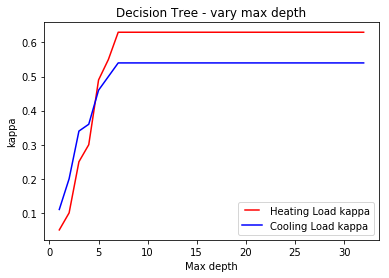

In [57]:
Heating_Load_Kappa = []
Cooling_Load_Kappa = []

max_depths = np.linspace(1, 32, 32, endpoint=True)

for md in max_depths:
    
    model = DecisionTreeClassifier(max_depth=md)
    model.fit(x1_train_sc, y1_train)
    y1_pred = model.predict(x1_test_sc)
    Cohen_Kappa_hot = round(cohen_kappa_score(y1_test,y1_pred),2)
    
    model.fit(x2_train_sc, y2_train)
    y2_pred = model.predict(x2_test_sc)
    Cohen_Kappa_cold = round(cohen_kappa_score(y2_test,y2_pred),2)
    
    Heating_Load_Kappa.append(Cohen_Kappa_hot)
    Cooling_Load_Kappa.append(Cohen_Kappa_cold)
    


line1, = plt.plot(max_depths, Heating_Load_Kappa, 'r', label = 'Heating Load kappa')
line2, = plt.plot(max_depths, Cooling_Load_Kappa, 'b', label = 'Cooling Load kappa')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('kappa')
plt.xlabel('Max depth')
plt.title('Decision Tree - vary max depth')
plt.show()

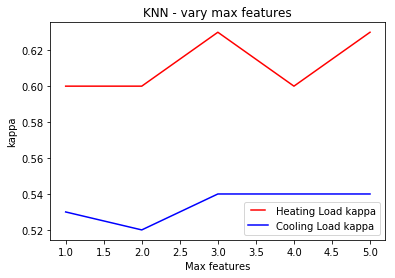

In [58]:
max_features = list(range(1,6))
Heating_Load_Kappa = []
Cooling_Load_Kappa = []


for mf in max_features:
    
    model = DecisionTreeClassifier(max_features=mf,max_depth=7)
    model.fit(x1_train_sc, y1_train)
    y1_pred = model.predict(x1_test_sc)
    Cohen_Kappa_hot = round(cohen_kappa_score(y1_test,y1_pred),2)
    
    model.fit(x2_train_sc, y2_train)
    y2_pred = model.predict(x2_test_sc)
    Cohen_Kappa_cold = round(cohen_kappa_score(y2_test,y2_pred),2)
    
    Heating_Load_Kappa.append(Cohen_Kappa_hot)
    Cooling_Load_Kappa.append(Cohen_Kappa_cold)
    


line1, = plt.plot(max_features, Heating_Load_Kappa, 'r', label = 'Heating Load kappa')
line2, = plt.plot(max_features, Cooling_Load_Kappa, 'b', label = 'Cooling Load kappa')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('kappa')
plt.xlabel('Max features')
plt.title('KNN - vary max features')
plt.show()


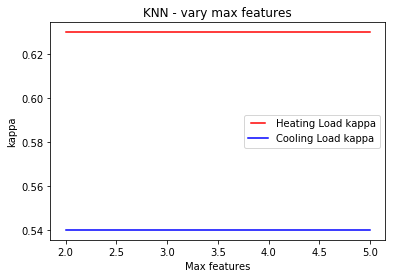

In [59]:
min_Samples = list(range(2,6))
Heating_Load_Kappa = []
Cooling_Load_Kappa = []


for ms in min_Samples:
    
    model = DecisionTreeClassifier(min_samples_split=ms,max_depth=7)
    model.fit(x1_train_sc, y1_train)
    y1_pred = model.predict(x1_test_sc)
    Cohen_Kappa_hot = round(cohen_kappa_score(y1_test,y1_pred),2)
    
    model.fit(x2_train_sc, y2_train)
    y2_pred = model.predict(x2_test_sc)
    Cohen_Kappa_cold = round(cohen_kappa_score(y2_test,y2_pred),2)
    
    Heating_Load_Kappa.append(Cohen_Kappa_hot)
    Cooling_Load_Kappa.append(Cohen_Kappa_cold)
    


line1, = plt.plot(min_Samples, Heating_Load_Kappa, 'r', label = 'Heating Load kappa')
line2, = plt.plot(min_Samples, Cooling_Load_Kappa, 'b', label = 'Cooling Load kappa')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('kappa')
plt.xlabel('Max features')
plt.title('KNN - vary max features')
plt.show()


In [60]:
Heating_Load_Kappa = []
Cooling_Load_Kappa = []

kernels = ['linear', 'rbf', 'poly']

for kernel in kernels:
    svc = SVC(kernel=kernel).fit(x1_train_sc, y1_train)
    y1_pred = svc.predict(x1_test_sc)
    Cohen_Kappa_hot = round(cohen_kappa_score(y1_test,y1_pred),2)
    Heating_Load_Kappa.append(Cohen_Kappa_hot)
    
    svc = SVC(kernel=kernel).fit(x2_train_sc, y2_train)
    y2_pred = model.predict(x2_test_sc)
    Cohen_Kappa_cold = round(cohen_kappa_score(y2_test,y2_pred),2)
    Cooling_Load_Kappa.append(Cohen_Kappa_cold)

In [61]:
Heating_Load_Kappa

[0.47, 0.54, 0.46]

In [62]:
Cooling_Load_Kappa

[0.54, 0.54, 0.54]

In [63]:
Heating_Load_Kappa = []
Cooling_Load_Kappa = []

gammas = [0.1, 0.5, 10, 100]

for gamma in gammas:
    svc = SVC(gamma=gamma).fit(x1_train_sc, y1_train)
    y1_pred = svc.predict(x1_test_sc)
    Cohen_Kappa_hot = round(cohen_kappa_score(y1_test,y1_pred),2)
    Heating_Load_Kappa.append(Cohen_Kappa_hot)
    
    svc = SVC(kernel=kernel).fit(x2_train_sc, y2_train)
    y2_pred = model.predict(x2_test_sc)
    Cohen_Kappa_cold = round(cohen_kappa_score(y2_test,y2_pred),2)
    Cooling_Load_Kappa.append(Cohen_Kappa_cold)

In [64]:
Heating_Load_Kappa

[0.42, 0.63, 0.63, 0.63]

In [65]:
Cooling_Load_Kappa

[0.54, 0.54, 0.54, 0.54]

In [66]:
cs = [0.1, 1, 10, 100, 1000]

for c in cs:
    svc = SVC(C=c,gamma=0.5).fit(x1_train_sc, y1_train)
    y1_pred = svc.predict(x1_test_sc)
    Cohen_Kappa_hot = round(cohen_kappa_score(y1_test,y1_pred),2)
    Heating_Load_Kappa.append(Cohen_Kappa_hot)
    
    svc = SVC(C=c,gamma=0.5).fit(x2_train_sc, y2_train)
    y2_pred = model.predict(x2_test_sc)
    Cohen_Kappa_cold = round(cohen_kappa_score(y2_test,y2_pred),2)
    Cooling_Load_Kappa.append(Cohen_Kappa_cold)

In [67]:
Heating_Load_Kappa

[0.42, 0.63, 0.63, 0.63, 0.3, 0.63, 0.63, 0.63, 0.63]

In [68]:
Cooling_Load_Kappa

[0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54]

In [69]:
degrees = [0, 1, 2, 3, 4, 5, 6]

for degree in degrees:
    svc = SVC(C=1,gamma=0.5,kernel='poly',degree=degree).fit(x1_train_sc, y1_train)
    y1_pred = svc.predict(x1_test_sc)
    Cohen_Kappa_hot = round(cohen_kappa_score(y1_test,y1_pred),2)
    Heating_Load_Kappa.append(Cohen_Kappa_hot)
    
    svc = SVC(C=c,gamma=0.5).fit(x2_train_sc, y2_train)
    y2_pred = model.predict(x2_test_sc)
    Cohen_Kappa_cold = round(cohen_kappa_score(y2_test,y2_pred),2)
    Cooling_Load_Kappa.append(Cohen_Kappa_cold)

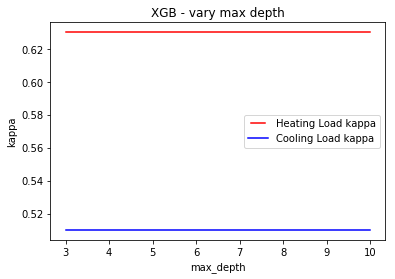

In [70]:
Heating_Load_Kappa = []
Cooling_Load_Kappa = []

max_depths = [3,4,5,6,7,8,9,10]

for max_depth in max_depths:
    xgb1 = XGBClassifier(max_depth=max_depth)
    xgb1.fit(x1_train_sc,y1_train)
    y1_pred = xgb1.predict(x1_test_sc)
    Cohen_Kappa_hot = round(cohen_kappa_score(y1_test,y1_pred),2)
    Heating_Load_Kappa.append(Cohen_Kappa_hot)

    xgb2 = XGBClassifier(max_depth=max_depth)
    xgb2.fit(x2_train_sc,y2_train)
    y2_pred = xgb2.predict(x2_test_sc)
    Cohen_Kappa_cold = round(cohen_kappa_score(y2_test,y2_pred),2)
    Cooling_Load_Kappa.append(Cohen_Kappa_cold)
    
    
line1, = plt.plot(max_depths, Heating_Load_Kappa, 'r', label = 'Heating Load kappa')
line2, = plt.plot(max_depths, Cooling_Load_Kappa, 'b', label = 'Cooling Load kappa')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('kappa')
plt.xlabel('max_depth')
plt.title('XGB - vary max depth')
plt.show()

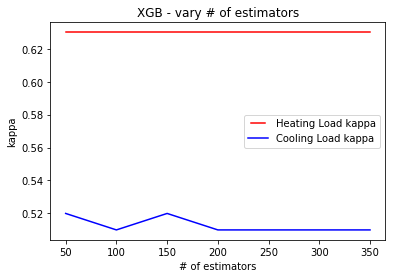

In [71]:
Heating_Load_Kappa = []
Cooling_Load_Kappa = []

n_estimators = range(50, 400, 50)

for n_est in n_estimators:
    xgb1 = XGBClassifier(n_estimators=n_est)
    xgb1.fit(x1_train_sc,y1_train)
    y1_pred = xgb1.predict(x1_test_sc)
    Cohen_Kappa_hot = round(cohen_kappa_score(y1_test,y1_pred),2)
    Heating_Load_Kappa.append(Cohen_Kappa_hot)

    xgb2 = XGBClassifier(n_estimators=n_est)
    xgb2.fit(x2_train_sc,y2_train)
    y2_pred = xgb2.predict(x2_test_sc)
    Cohen_Kappa_cold = round(cohen_kappa_score(y2_test,y2_pred),2)
    Cooling_Load_Kappa.append(Cohen_Kappa_cold)
    
    
line1, = plt.plot(n_estimators, Heating_Load_Kappa, 'r', label = 'Heating Load kappa')
line2, = plt.plot(n_estimators, Cooling_Load_Kappa, 'b', label = 'Cooling Load kappa')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('kappa')
plt.xlabel('# of estimators')
plt.title('XGB - vary # of estimators')
plt.show()

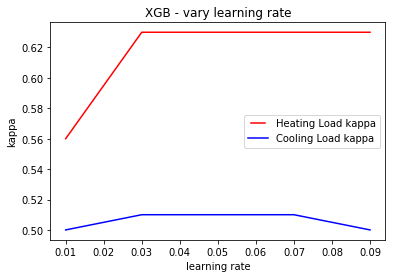

In [72]:
Heating_Load_Kappa = []
Cooling_Load_Kappa = []

learning_rates = [0.01, 0.03, 0.05, 0.07, 0.09]

for lrat in learning_rates:
    xgb1 = XGBClassifier(learning_rate=lrat)
    xgb1.fit(x1_train_sc,y1_train)
    y1_pred = xgb1.predict(x1_test_sc)
    Cohen_Kappa_hot = round(cohen_kappa_score(y1_test,y1_pred),2)
    Heating_Load_Kappa.append(Cohen_Kappa_hot)

    xgb2 = XGBClassifier(learning_rate=lrat)
    xgb2.fit(x2_train_sc,y2_train)
    y2_pred = xgb2.predict(x2_test_sc)
    Cohen_Kappa_cold = round(cohen_kappa_score(y2_test,y2_pred),2)
    Cooling_Load_Kappa.append(Cohen_Kappa_cold)
    
    
line1, = plt.plot(learning_rates, Heating_Load_Kappa, 'r', label = 'Heating Load kappa')
line2, = plt.plot(learning_rates, Cooling_Load_Kappa, 'b', label = 'Cooling Load kappa')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('kappa')
plt.xlabel('learning rate')
plt.title('XGB - vary learning rate')
plt.show()

### Before starting regression, what if we try multioutput classifier?

In [73]:
# KNeighborsClassifier, XGBClassifier, SVC, RandomForest and Decision Tree Classifiers -- all applied MultiOutput

In [74]:
KNC_multi = MultiOutputClassifier(estimator=KNeighborsClassifier())
SVC_multi = MultiOutputClassifier(estimator=SVC(gamma=1))
RF_multi = MultiOutputClassifier(estimator=RandomForestClassifier())
DT_multi = MultiOutputClassifier(estimator=DecisionTreeClassifier())
XGB_multi = MultiOutputClassifier(estimator=XGBClassifier())

In [75]:
data.head()
x = data.drop(columns=['Heating Load','Cooling Load','Orientation','Glazing Area Distributon'])
x_std = std.fit(x).transform(x)
y = data[['Heating Load','Cooling Load']]
x_sc_train,x_sc_test,y_train,y_test = train_test_split(x_std,y,test_size=0.33,random_state=42)
hot_series = y_test.iloc[:,0]
cold_series = y_test.iloc[:,1]

In [76]:
Heating_Load_Kappa_Multi = []
Cooling_Load_Kappa_Multi = []

ytest_df = pd.DataFrame(y_test,columns=['Heating Load_actual','Cooling Load_actual'])

KNC_multi.fit(x_sc_train,y_train)
KNC_multi_y_pred = KNC_multi.predict(x_sc_test)
Cohen_Kappa_hot_KNC_multi = round(cohen_kappa_score(KNC_multi_y_pred[:,0],hot_series),2)
Cohen_Kappa_cold_KNC_multi = round(cohen_kappa_score(KNC_multi_y_pred[:,1],cold_series),2)

Heating_Load_Kappa_Multi.append(Cohen_Kappa_hot_KNC_multi)
Cooling_Load_Kappa_Multi.append(Cohen_Kappa_cold_KNC_multi)


SVC_multi.fit(x_sc_train,y_train)
SVC_multi_y_pred = SVC_multi.predict(x_sc_test)
Cohen_Kappa_hot_SVC_multi = round(cohen_kappa_score(SVC_multi_y_pred[:,0],hot_series),2)
Cohen_Kappa_cold_SVC_multi = round(cohen_kappa_score(SVC_multi_y_pred[:,1],cold_series),2)

Heating_Load_Kappa_Multi.append(Cohen_Kappa_hot_SVC_multi)
Cooling_Load_Kappa_Multi.append(Cohen_Kappa_cold_SVC_multi)

DT_multi.fit(x_sc_train,y_train)
DT_multi_y_pred = DT_multi.predict(x_sc_test)
Cohen_Kappa_hot_DT_multi = round(cohen_kappa_score(DT_multi_y_pred[:,0],hot_series),2)
Cohen_Kappa_cold_DT_multi = round(cohen_kappa_score(DT_multi_y_pred[:,1],cold_series),2)

Heating_Load_Kappa_Multi.append(Cohen_Kappa_hot_DT_multi)
Cooling_Load_Kappa_Multi.append(Cohen_Kappa_cold_DT_multi)

XGB_multi.fit(x_sc_train,y_train)
XGB_multi_y_pred = XGB_multi.predict(x_sc_test)
Cohen_Kappa_hot_XGB_multi = round(cohen_kappa_score(DT_multi_y_pred[:,0],hot_series),2)
Cohen_Kappa_cold_XGB_multi = round(cohen_kappa_score(DT_multi_y_pred[:,1],cold_series),2)

Heating_Load_Kappa_Multi.append(Cohen_Kappa_hot_XGB_multi)
Cooling_Load_Kappa_Multi.append(Cohen_Kappa_cold_XGB_multi)

In [77]:
Heating_Load_MultiPrediction_kappa = DataFrame([Heating_Load_Kappa_Multi],columns=['KNeighborsClassifier','SVC',
                                                                      'Decision Tree Classifier','XGB'])

Cooling_Load_MultiPrediction_kappa = DataFrame([Cooling_Load_Kappa_Multi],columns=['KNeighborsClassifier','SVC',
                                                                      'Decision Tree Classifier','XGB'])

In [78]:
Heating_Load_MultiPrediction_kappa #Had to drop a bunch of input variables to match single output predictor

,KNeighborsClassifier,SVC,Decision Tree Classifier,XGB
0,0.56,0.62,0.6,0.6


In [79]:
Cooling_Load_MultiPrediction_kappa

,KNeighborsClassifier,SVC,Decision Tree Classifier,XGB
0,0.5,0.5,0.53,0.53


In [80]:
Heating_Load_Prediction_kappa

,KNeighborsClassifier,SVC,Decision Tree Classifier,Random Forest Classifier,AdaBoost Classifier,GaussianNB,XGB,Dummy
0,0.63,0.63,0.63,0.63,0.05,0.31,0.63,0.01


In [81]:
Cooling_Load_Prediction_kappa

,KNeighborsClassifier,SVC,Decision Tree Classifier,Random Forest Classifier,AdaBoost Classifier,GaussianNB,XGB,Dummy
0,0.5,0.52,0.54,0.51,0.12,0.43,0.51,0.0


### Repeating iterations above, now using regression models

In [82]:
names = ["RFR", "SVR", "Grad Boost Regressor", "KN Regressor",
         "AdaBoost Regressor", 'DecisionTreeRegressor',"Dummy Regressor"]

regressors = [
    RandomForestRegressor(),
    SVR(),
    GradientBoostingRegressor(),
    KNeighborsRegressor(),
    AdaBoostRegressor(),
    DecisionTreeRegressor(),    
    DummyRegressor()]

In [83]:
x = data.drop(columns=['Heating Load','Cooling Load'])
y1 = data['Heating Load']
y2 = data['Cooling Load']

In [84]:
Heating_Load_Explained_Var= []
Cooling_Load_Explained_Var = []

for name, rgr in zip(names, regressors):
    x1_train, x1_test, y1_train, y1_test = train_test_split(x, y1, test_size=0.1, random_state=42)
    x2_train, x2_test, y2_train, y2_test = train_test_split(x, y2, test_size=0.2, random_state=24)
    
    rgr.fit(x1_train, y1_train)
    y1_pred = rgr.predict(x1_test)
    expl_var_hot = round(explained_variance_score(y1_test,y1_pred),3)
    Heating_Load_Explained_Var.append(expl_var_hot)
    
    rgr.fit(x2_train, y2_train)
    y2_pred = rgr.predict(x2_test)
    expl_var_cold = round(explained_variance_score(y2_test,y2_pred),3)   
    Cooling_Load_Explained_Var.append(expl_var_cold)



In [85]:
Heating_Load_Explained_Var = DataFrame([Heating_Load_Explained_Var],columns=['RandomForestRegressor','SVR',
                                                                      'Gradient Boosting Regressor','KNeighborsRegressor',
                                                                            'AdaBoost Regressor','DecisionTreeRegressor',
                                                                             'DummyRegressor'])

Cooling_Load_Explained_Var = DataFrame([Cooling_Load_Explained_Var],columns=['RandomForestRegressor','SVR',
                                                                      'Gradient Boosting Regressor','KNeighborsRegressor',
                                                                            'AdaBoost Regressor','DecisionTreeRegressor',
                                                                             'DummyRegressor'])


In [86]:
Heating_Load_Explained_Var

,RandomForestRegressor,SVR,Gradient Boosting Regressor,KNeighborsRegressor,AdaBoost Regressor,DecisionTreeRegressor,DummyRegressor
0,0.997,0.74,0.997,0.965,0.959,0.996,0.0


In [87]:
Cooling_Load_Explained_Var

,RandomForestRegressor,SVR,Gradient Boosting Regressor,KNeighborsRegressor,AdaBoost Regressor,DecisionTreeRegressor,DummyRegressor
0,0.959,0.744,0.966,0.963,0.942,0.914,0.0


## Applying k-fold cross validation in lieu of test-train-split

In [88]:
data = pd.read_csv('ENB2012_data.csv')

data['Heating Load'] = round(data['Heating Load'])
data['Cooling Load'] = round(data['Cooling Load'])

data.dropna(inplace=True)

x = data.drop(columns=['Heating Load','Cooling Load'])
y1 = data['Heating Load']
y2 = data['Cooling Load']



In [89]:
cv = KFold(10,True,1)

In [90]:
x.drop(columns=['Glazing Area Distributon','Orientation'],inplace=True)
x['Total SA'] = x['Roof Area'] + x['Wall Area']
x.drop(columns=['Roof Area','Wall Area'],inplace=True)

In [91]:
std = StandardScaler()
x_sc = std.fit(x).transform(x)

Heating_Load_crossval_accuracy = []
Cooling_Load_crossval_accuracy = []

for clf in classifiers:
    clfscore_heat_load = cross_val_score(clf,x_sc,y1,cv=cv,scoring='accuracy')
    clfscore_heat_load = round(np.mean(clfscore_heat_load),2)
    Heating_Load_crossval_accuracy.append(clfscore_heat_load)
    
    clfscore_cool_load = cross_val_score(clf,x_sc,y2,cv=cv,scoring='accuracy')
    clfscore_cool_load = round(np.mean(clfscore_cool_load),2)
    Cooling_Load_crossval_accuracy.append(clfscore_cool_load)
    
from pandas import DataFrame

Heating_Load_Accuracy_classifier = DataFrame([Heating_Load_crossval_accuracy],columns=['KNeighborsClassifier','SVC',
                                                                      'Decision Tree Classifier','Random Forest Classifier',
                                                                      'AdaBoost Classifier','GaussianNB','XGB','Dummy'])

Cooling_Load_Accuracy_classifier = DataFrame([Cooling_Load_crossval_accuracy],columns=['KNeighborsClassifier','SVC',
                                                                      'Decision Tree Classifier','Random Forest Classifier',
                                                                      'AdaBoost Classifier','GaussianNB','XGB','Dummy'])
    

C:\Users\ver2bj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [92]:
Heating_Load_Accuracy_classifier

,KNeighborsClassifier,SVC,Decision Tree Classifier,Random Forest Classifier,AdaBoost Classifier,GaussianNB,XGB,Dummy
0,0.62,0.65,0.64,0.65,0.14,0.4,0.65,0.04


In [93]:
Cooling_Load_Accuracy_classifier 

,KNeighborsClassifier,SVC,Decision Tree Classifier,Random Forest Classifier,AdaBoost Classifier,GaussianNB,XGB,Dummy
0,0.55,0.56,0.56,0.55,0.15,0.39,0.55,0.05


In [94]:
data = pd.read_csv('ENB2012_data.csv')

data.dropna(inplace=True)

x = data.drop(columns=['Heating Load','Cooling Load'])
y1 = data['Heating Load']
y2 = data['Cooling Load']

x.drop(columns=['Glazing Area Distributon','Orientation','Relative Compactness'],inplace=True)


In [95]:
x.skew()

Surface Area     -0.125131
Wall Area         0.533417
Roof Area        -0.162764
Overall Height    0.000000
Glazing Area     -0.060254
dtype: float64

In [96]:
x_sc = std.fit(x).transform(x)

Heating_Load_crossval_explvar = []
Cooling_Load_crossval_explvar = []

for rgr in regressors:
    rgrscore_heat_load = cross_val_score(rgr,x_sc,y1,cv=cv,scoring='explained_variance')
    rgrscore_heat_load = round(np.mean(rgrscore_heat_load),3)
    Heating_Load_crossval_explvar.append(rgrscore_heat_load)
    
    rgrscore_cool_load = cross_val_score(rgr,x_sc,y2,cv=cv,scoring='explained_variance')
    rgrscore_cool_load = round(np.mean(rgrscore_cool_load),3)
    Cooling_Load_crossval_explvar.append(rgrscore_cool_load)
    
    

Heating_Load_ExplVar_regressor = DataFrame([Heating_Load_crossval_explvar],columns=['RandomForestRegressor','SVR',
                                                                      'Gradient Boosting Regressor','KNeighborsRegressor',
                                                                            'AdaBoost Regressor','DecisionTreeRegressor',
                                                                             'DummyRegressor'])


Cooling_Load_ExplVar_regressor = DataFrame([Cooling_Load_crossval_explvar],columns=['RandomForestRegressor','SVR',
                                                                      'Gradient Boosting Regressor','KNeighborsRegressor',
                                                                            'AdaBoost Regressor','DecisionTreeRegressor',
                                                                             'DummyRegressor'])


In [97]:
Heating_Load_ExplVar_regressor

,RandomForestRegressor,SVR,Gradient Boosting Regressor,KNeighborsRegressor,AdaBoost Regressor,DecisionTreeRegressor,DummyRegressor
0,0.998,0.937,0.998,0.993,0.966,0.998,0.0


In [98]:
Cooling_Load_ExplVar_regressor

,RandomForestRegressor,SVR,Gradient Boosting Regressor,KNeighborsRegressor,AdaBoost Regressor,DecisionTreeRegressor,DummyRegressor
0,0.967,0.914,0.968,0.962,0.939,0.967,0.0


In [99]:
Heating_Load_crossval_MSE = []
Cooling_Load_crossval_MSE = []

for rgr in regressors:
    rgrscore_heat_load = cross_val_score(rgr,x_sc,y1,cv=cv,scoring='neg_root_mean_squared_error')
    rgrscore_heat_load = round(np.mean(rgrscore_heat_load),3)
    Heating_Load_crossval_MSE.append(rgrscore_heat_load)
    
    rgrscore_cool_load = cross_val_score(rgr,x_sc,y2,cv=cv,scoring='neg_root_mean_squared_error')
    rgrscore_cool_load = round(np.mean(rgrscore_cool_load),3)
    Cooling_Load_crossval_MSE.append(rgrscore_cool_load)
    
    

Heating_Load_MSE_regressor = DataFrame([Heating_Load_crossval_MSE],columns=['RandomForestRegressor','SVR',
                                                                      'Gradient Boosting Regressor','KNeighborsRegressor',
                                                                            'AdaBoost Regressor','DecisionTreeRegressor',
                                                                             'DummyRegressor'])


Cooling_Load_MSE_regressor = DataFrame([Cooling_Load_crossval_MSE],columns=['RandomForestRegressor','SVR',
                                                                      'Gradient Boosting Regressor','KNeighborsRegressor',
                                                                            'AdaBoost Regressor','DecisionTreeRegressor',
                                                                             'DummyRegressor'])


In [100]:
Heating_Load_MSE_regressor

,RandomForestRegressor,SVR,Gradient Boosting Regressor,KNeighborsRegressor,AdaBoost Regressor,DecisionTreeRegressor,DummyRegressor
0,-0.484,-2.516,-0.486,-0.811,-1.843,-0.48,-10.087


In [101]:
Cooling_Load_MSE_regressor

,RandomForestRegressor,SVR,Gradient Boosting Regressor,KNeighborsRegressor,AdaBoost Regressor,DecisionTreeRegressor,DummyRegressor
0,-1.699,-2.801,-1.681,-1.821,-2.389,-1.707,-9.514


### Switch to deep learning model, no preprocessing

In [102]:
%pip install keras
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [103]:
from keras.models import Sequential
from keras.layers import Dense

from keras.wrappers.scikit_learn import KerasRegressor

Using TensorFlow backend.


In [104]:
data = pd.read_csv('ENB2012_data.csv')

data['Heating Load'] = round(data['Heating Load'])
data['Cooling Load'] = round(data['Cooling Load'])

data.dropna(inplace=True)

x = data.drop(columns=['Heating Load','Cooling Load'])
y1 = data['Heating Load']
y2 = data['Cooling Load']

y = data[['Heating Load','Cooling Load']]

# x1_train, x1_test, y1_train, y1_test = train_test_split(x, y1, test_size=0.33, random_state=42)
# x2_train, x2_test, y2_train, y2_test = train_test_split(x, y2, test_size=0.33, random_state=24)


In [105]:
def baseline_model():
    model = Sequential()
    model.add(Dense(8, input_dim=8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [106]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=baseline_model, epochs=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, x, y1, cv=kfold)
print("Error: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Error: -9.35 (5.66) MSE


In [107]:
def baseline_model_two():
    model = Sequential()
    model.add(Dense(8, input_dim=8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(2, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=baseline_model_two, epochs=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, x, y, cv=kfold)
print("Error: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Error: -9.98 (4.14) MSE


In [108]:
def bigger_model_two():
    model = Sequential()
    model.add(Dense(20, input_dim=8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(10, kernel_initializer='normal', activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(2, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=baseline_model_two, epochs=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, x, y, cv=kfold)
print("Error: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Error: -9.68 (3.71) MSE


In [109]:
def bigger_model():
    model = Sequential()
    model.add(Dense(20, input_dim=8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(10, kernel_initializer='normal', activation='relu'))
    model.add(Dense(8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [110]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=bigger_model, epochs=150, batch_size=10, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=20)
results = cross_val_score(pipeline, x, y1, cv=kfold)
print("Error: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Error: -7.75 (6.07) MSE


In [111]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=bigger_model, epochs=150, batch_size=10, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=20)
results = cross_val_score(pipeline, x, y2, cv=kfold)
print("Error: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Error: -9.78 (3.10) MSE
